In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

# Exploratory Data Analysis with Seaborn and Pandas

## Seaborn

Seaborn is a library for making attractive and informative statistical graphics in Python. It is built on top of matplotlib and tightly integrated with the Python Data Science stack, including support for numpy and pandas data structures and statistical routines from scipy and statsmodels.

Some of the features that seaborn offers are

* Several built-in themes that improve on the default matplotlib aesthetics
* Tools for choosing color palettes to make beautiful plots that reveal patterns in your data
* Functions for visualizing univariate and bivariate distributions or for comparing them between subsets of data
* Tools that fit and visualize linear regression models for different kinds of independent and dependent variables
* Functions that visualize matrices of data and use clustering algorithms to discover structure in those matrices
* A function to plot statistical timeseries data with flexible estimation and representation of uncertainty around the estimate
* High-level abstractions for structuring grids of plots that let you easily build complex visualizations

Seaborn aims to make visualization a central part of exploring and understanding data. The plotting functions operate on dataframes and arrays containing a whole dataset and internally perform the necessary aggregation and statistical model-fitting to produce informative plots. If matplotlib “tries to make easy things easy and hard things possible”, seaborn tries to make a well-defined set of hard things easy too.

Seaborn should be thought of as a complement to matplotlib, not a replacement for it. When using seaborn, it is likely that you will often invoke matplotlib functions directly to draw simpler plots already available through the pyplot namespace. Further, while the seaborn functions aim to make plots that are reasonably “production ready” (including extracting semantic information from Pandas objects to add informative labels), full customization of the figures will require a sophisticated understanding of matplotlib objects.


In [2]:
# standard import statement for seaborn
import seaborn as sns

## What is Exploratory Data Analysis (EDA)

Exploratory data analysis is an approach to analyzing data sets to summarize their main characteristics, often with visual methods.  It is used to understand the data, get context about it, understand the variables and the relashionship between them, and formulate hypotheses that could be useful when building predictive models.

# Doing Exploratory Data Analysis

## Loading the data

In [3]:
housing = pd.read_csv("house_train.csv")
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
housing.shape

(1460, 81)

In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
housing.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## The questions that will guide our analysis

All data analysis must be guided by some key questions or objectives that conduct all that we do. As example here are the two objectives that will guide our exploration of the data set:

> **1. Understand the individual variables in the dataset**

> **2. Understand how the variables in this dataset relate with the SalePrice of the house**

**Understand the data and the problem**: the more context you have, the better. It is a good idea to take a look at each variable and think about their meaning and importance for this problem.

For each variable in the dataset you should know it's **Type**. In general there are two possible types of variables: 'numerical' or 'categorical'. By 'numerical' we mean variables for which the values are numbers, and by 'categorical' we mean variables for which the values are categories.

**Numerical variables**

- **SalePrice**
- **LotArea:** Lot size in square feet
- **OverallQual:** Rates the overall material and finish of the house
- **OverallCond:** Rates the overall condition of the house
- **1stFlrSF:** First Floor square feet
- **2ndFlrSF:** Second floor square feet
- **BedroomAbvGr:** Bedrooms above grade (does NOT include basement bedrooms)
- **YearBuilt:** Original construction date (this is not technically a numeric variable but we will use it to produce another variable called Age)

**Categorical variables**

- **MSZoning:** Identifies the general zoning classification of the sale.
- **LotShape:** General shape of property
- **Neighborhood:** Physical locations within Ames city limits
- **CentralAir:** Central air conditioning
- **SaleCondition:** Condition of sale
- **MoSold:** Month Sold (MM)
- **YrSold:** Year Sold (YYYY)

In [7]:
numerical_vars = ['SalePrice','LotArea', 'OverallQual', 'OverallCond', 
                  'YearBuilt', '1stFlrSF', '2ndFlrSF', 'BedroomAbvGr']
categorical_vars = ['MSZoning', 'LotShape', 'Neighborhood', 'CentralAir', 'SaleCondition', 'MoSold', 'YrSold']

In [8]:
housing = housing[numerical_vars+categorical_vars]

In [9]:
housing.shape

(1460, 15)

In [10]:
housing.head()

,SalePrice,LotArea,OverallQual,OverallCond,YearBuilt,1stFlrSF,2ndFlrSF,BedroomAbvGr,MSZoning,LotShape,Neighborhood,CentralAir,SaleCondition,MoSold,YrSold
0,208500,8450,7,5,2003,856,854,3,RL,Reg,CollgCr,Y,Normal,2,2008
1,181500,9600,6,8,1976,1262,0,3,RL,Reg,Veenker,Y,Normal,5,2007
2,223500,11250,7,5,2001,920,866,3,RL,IR1,CollgCr,Y,Normal,9,2008
3,140000,9550,7,5,1915,961,756,3,RL,IR1,Crawfor,Y,Abnorml,2,2006
4,250000,14260,8,5,2000,1145,1053,4,RL,IR1,NoRidge,Y,Normal,12,2008


## Understanding the main variable - SalePrice

In [11]:
#descriptive statistics summary
housing['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [12]:
housing.describe()

,SalePrice,LotArea,OverallQual,OverallCond,YearBuilt,1stFlrSF,2ndFlrSF,BedroomAbvGr,MoSold,YrSold
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,180921.195890,10516.828082,6.099315,5.575342,1971.267808,1162.626712,346.992466,2.866438,6.321918,2007.815753
std,79442.502883,9981.264932,1.382997,1.112799,30.202904,386.587738,436.528436,0.815778,2.703626,1.328095
min,34900.000000,1300.000000,1.000000,1.000000,1872.000000,334.000000,0.000000,0.000000,1.000000,2006.000000
25%,129975.000000,7553.500000,5.000000,5.000000,1954.000000,882.000000,0.000000,2.000000,5.000000,2007.000000
50%,163000.000000,9478.500000,6.000000,5.000000,1973.000000,1087.000000,0.000000,3.000000,6.000000,2008.000000
75%,214000.000000,11601.500000,7.000000,6.000000,2000.000000,1391.250000,728.000000,3.000000,8.000000,2009.000000
max,755000.000000,215245.000000,10.000000,9.000000,2010.000000,4692.000000,2065.000000,8.000000,12.000000,2010.000000


In [13]:
housing['SalePrice'].mode()

0    140000
dtype: int64

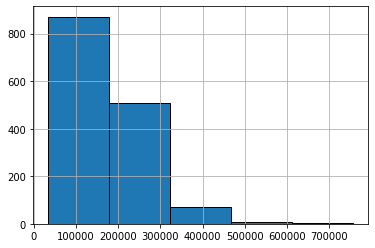

In [14]:
housing['SalePrice'].hist(edgecolor='black', bins=5); #Univariate Analysis

In [16]:
#skewness and kurtosis
print("Skewness: {:0.3f}".format(housing['SalePrice'].skew()))
print("Kurtosis: {:0.3f}".format(housing['SalePrice'].kurt()))

Skewness: 1.883
Kurtosis: 6.536


In [17]:
housing['SalePrice'].skew()

1.8828757597682129

1. Mean>Median>Mode - Positively Skewed


## Numerical variables

In [18]:
housing[numerical_vars].describe()

,SalePrice,LotArea,OverallQual,OverallCond,YearBuilt,1stFlrSF,2ndFlrSF,BedroomAbvGr
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,180921.195890,10516.828082,6.099315,5.575342,1971.267808,1162.626712,346.992466,2.866438
std,79442.502883,9981.264932,1.382997,1.112799,30.202904,386.587738,436.528436,0.815778
min,34900.000000,1300.000000,1.000000,1.000000,1872.000000,334.000000,0.000000,0.000000
25%,129975.000000,7553.500000,5.000000,5.000000,1954.000000,882.000000,0.000000,2.000000
50%,163000.000000,9478.500000,6.000000,5.000000,1973.000000,1087.000000,0.000000,3.000000
75%,214000.000000,11601.500000,7.000000,6.000000,2000.000000,1391.250000,728.000000,3.000000
max,755000.000000,215245.000000,10.000000,9.000000,2010.000000,4692.000000,2065.000000,8.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028169FC0A88>,
      dtype=object)

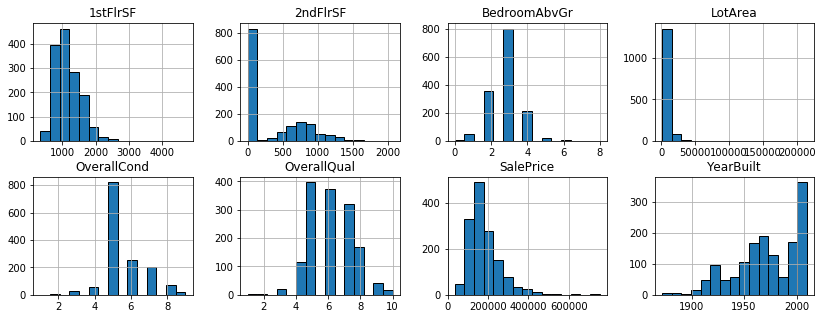

In [19]:
housing[numerical_vars].hist(edgecolor='black', bins=15, figsize=(14,5), layout = (2,4))

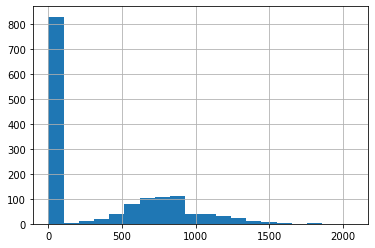

In [20]:
housing['2ndFlrSF'].hist(bins=20)

What can we see from this picture:

1. The distribution of sizes of the first floor is skewed to the right. This is expected, there a a few big houses.
2. There is a big peack at zero in the 2ndFlrSF variable. Those are the variables that don't have a second floor, so we can identify a new variable from this one.
3. Most houses have 3 bedrooms.
4. The lot area is highly skewed: there few houses with a large lot area.
5. The ratings for conditions and quality tend to be around 5, few houses have very high or low ratings.
6. The `YearBuilt` variable is actually not useful in the present form. However we can use it to construct a variable that actually make sense: Age of the house at the time o the sale.

In [21]:
#Variable Creation
housing['Age'] = housing['YrSold'] - housing['YearBuilt']
numerical_vars.remove('YearBuilt')
numerical_vars.append('Age')

In [22]:
print(housing['Age'])

0        5
1       31
2        7
3       91
4        8
        ..
1455     8
1456    32
1457    69
1458    60
1459    43
Name: Age, Length: 1460, dtype: int64


Now, it is very clear now that many houses where new when they were sold.

In [23]:
housing.head(10)

,SalePrice,LotArea,OverallQual,OverallCond,YearBuilt,1stFlrSF,2ndFlrSF,BedroomAbvGr,MSZoning,LotShape,Neighborhood,CentralAir,SaleCondition,MoSold,YrSold,Age
0,208500,8450,7,5,2003,856,854,3,RL,Reg,CollgCr,Y,Normal,2,2008,5
1,181500,9600,6,8,1976,1262,0,3,RL,Reg,Veenker,Y,Normal,5,2007,31
2,223500,11250,7,5,2001,920,866,3,RL,IR1,CollgCr,Y,Normal,9,2008,7
3,140000,9550,7,5,1915,961,756,3,RL,IR1,Crawfor,Y,Abnorml,2,2006,91
4,250000,14260,8,5,2000,1145,1053,4,RL,IR1,NoRidge,Y,Normal,12,2008,8
5,143000,14115,5,5,1993,796,566,1,RL,IR1,Mitchel,Y,Normal,10,2009,16
6,307000,10084,8,5,2004,1694,0,3,RL,Reg,Somerst,Y,Normal,8,2007,3
7,200000,10382,7,6,1973,1107,983,3,RL,IR1,NWAmes,Y,Normal,11,2009,36
8,129900,6120,7,5,1931,1022,752,2,RM,Reg,OldTown,Y,Abnorml,4,2008,77
9,118000,7420,5,6,1939,1077,0,2,RL,Reg,BrkSide,Y,Normal,1,2008,69


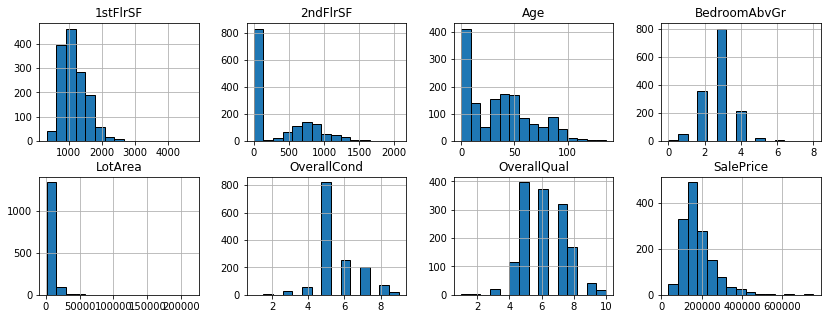

In [24]:
housing[numerical_vars].hist(edgecolor='black', bins=15, figsize=(14, 5), layout = (2,4));

 ## Categorical variables

When examining categorical variables we want to see the distribution of observations in the different categories.

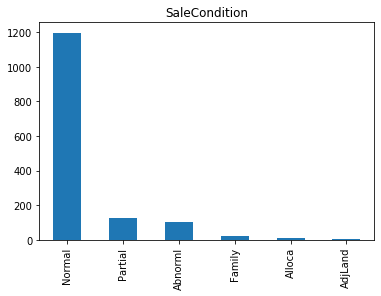

In [25]:
housing['SaleCondition'].value_counts().plot(kind='bar', title='SaleCondition')

In [26]:
housing['SaleCondition'].value_counts()


Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

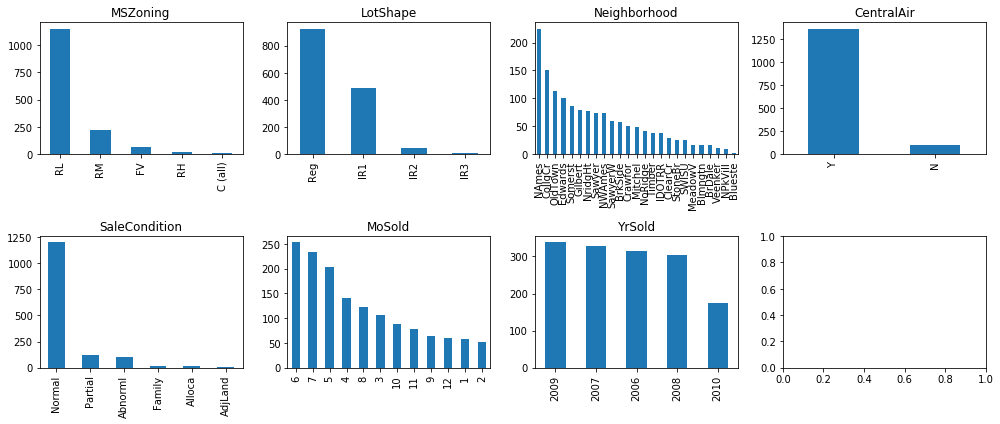

In [27]:
fig, ax = plt.subplots(2,4, figsize=(14,6))
for i, j in zip(categorical_vars, ax.flatten()):
    
    housing[i].value_counts().plot(kind='bar', ax=j, title=i)

fig.tight_layout()

1. Many houses were sold in year 2009.
2. Many houses are air conditioned.
3. 

In [28]:
housing['SaleCondition'].value_counts()

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

## Relationships between numerical variables

The seaborn library excels when we want to investigate relationship between variables, with very few lines of code we can get very informative plots and discover patterns and relationships between our variables.

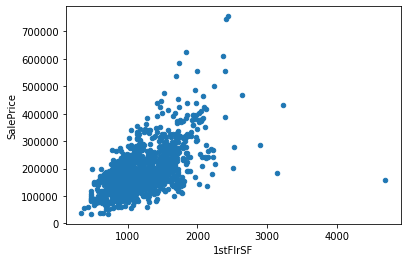

In [29]:
housing.plot.scatter(x='1stFlrSF', y='SalePrice'); #Bivariate Analysis

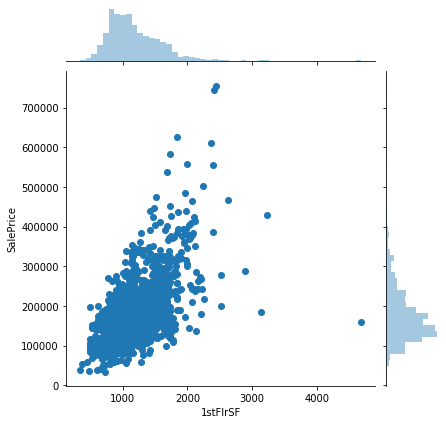

In [30]:
sns.jointplot(x='1stFlrSF', y='SalePrice', data=housing);

In [31]:
housing[numerical_vars[:4]]

,SalePrice,LotArea,OverallQual,OverallCond
0,208500,8450,7,5
1,181500,9600,6,8
2,223500,11250,7,5
3,140000,9550,7,5
4,250000,14260,8,5
...,...,...,...,...
1455,175000,7917,6,5
1456,210000,13175,6,6
1457,266500,9042,7,9
1458,142125,9717,5,6


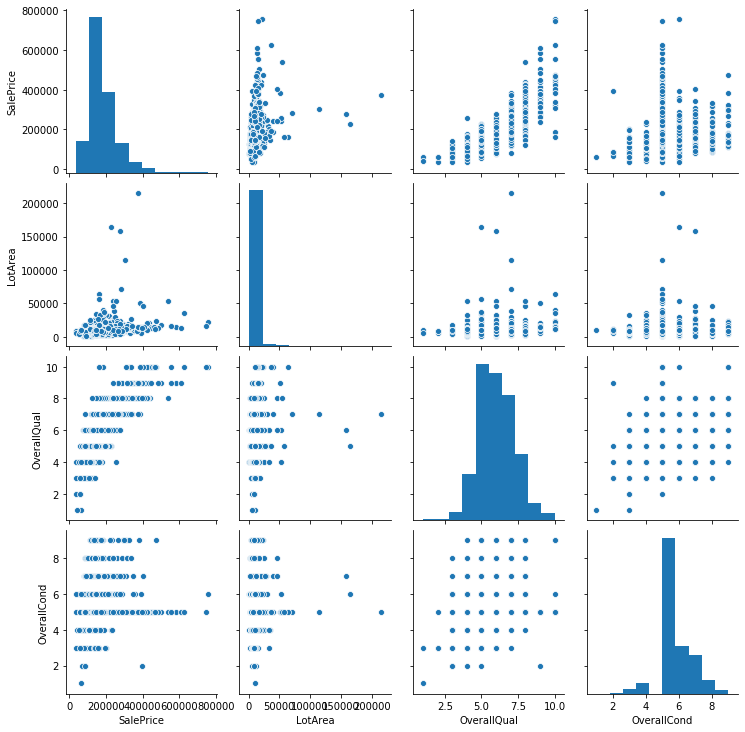

In [32]:
sns.pairplot(housing[numerical_vars[:4]]);

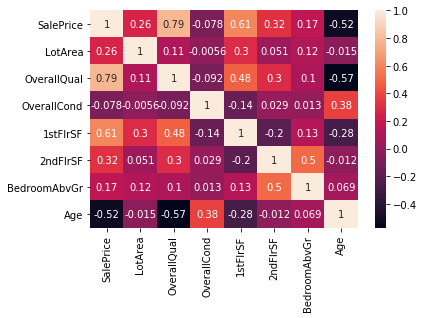

In [33]:
sns.heatmap(housing[numerical_vars].corr(), annot=True)

In [34]:
housing[numerical_vars].corr()

,SalePrice,LotArea,OverallQual,OverallCond,1stFlrSF,2ndFlrSF,BedroomAbvGr,Age
SalePrice,1.000000,0.263843,0.790982,-0.077856,0.605852,0.319334,0.168213,-0.523350
LotArea,0.263843,1.000000,0.105806,-0.005636,0.299475,0.050986,0.119690,-0.014832
OverallQual,0.790982,0.105806,1.000000,-0.091932,0.476224,0.295493,0.101676,-0.572629
OverallCond,-0.077856,-0.005636,-0.091932,1.000000,-0.144203,0.028942,0.012980,0.377325
1stFlrSF,0.605852,0.299475,0.476224,-0.144203,1.000000,-0.202646,0.127401,-0.282143
2ndFlrSF,0.319334,0.050986,0.295493,0.028942,-0.202646,1.000000,0.502901,-0.011552
BedroomAbvGr,0.168213,0.119690,0.101676,0.012980,0.127401,0.502901,1.000000,0.068960
Age,-0.523350,-0.014832,-0.572629,0.377325,-0.282143,-0.011552,0.068960,1.000000


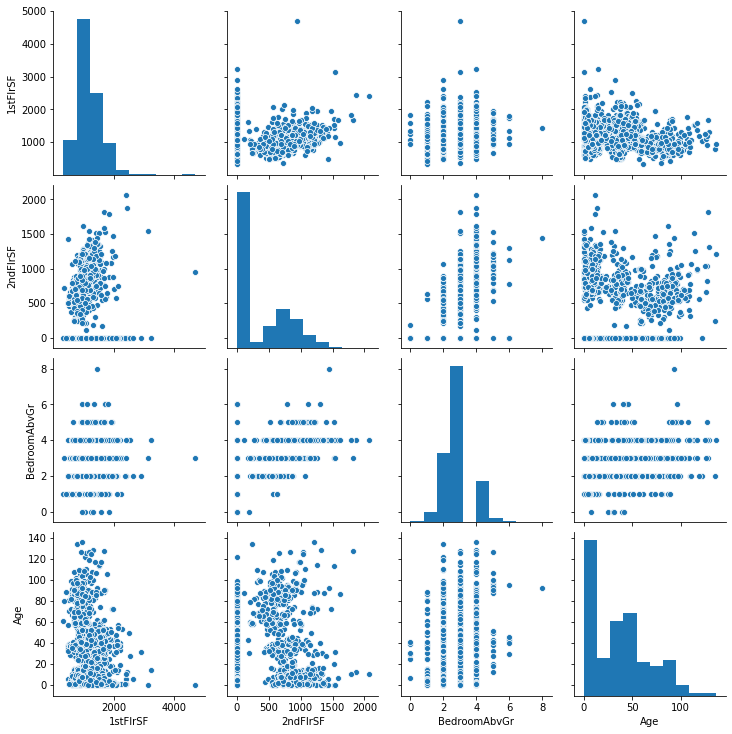

In [35]:
sns.pairplot(housing[numerical_vars[4:]])

In [36]:
print(numerical_vars[:4])

['SalePrice', 'LotArea', 'OverallQual', 'OverallCond']


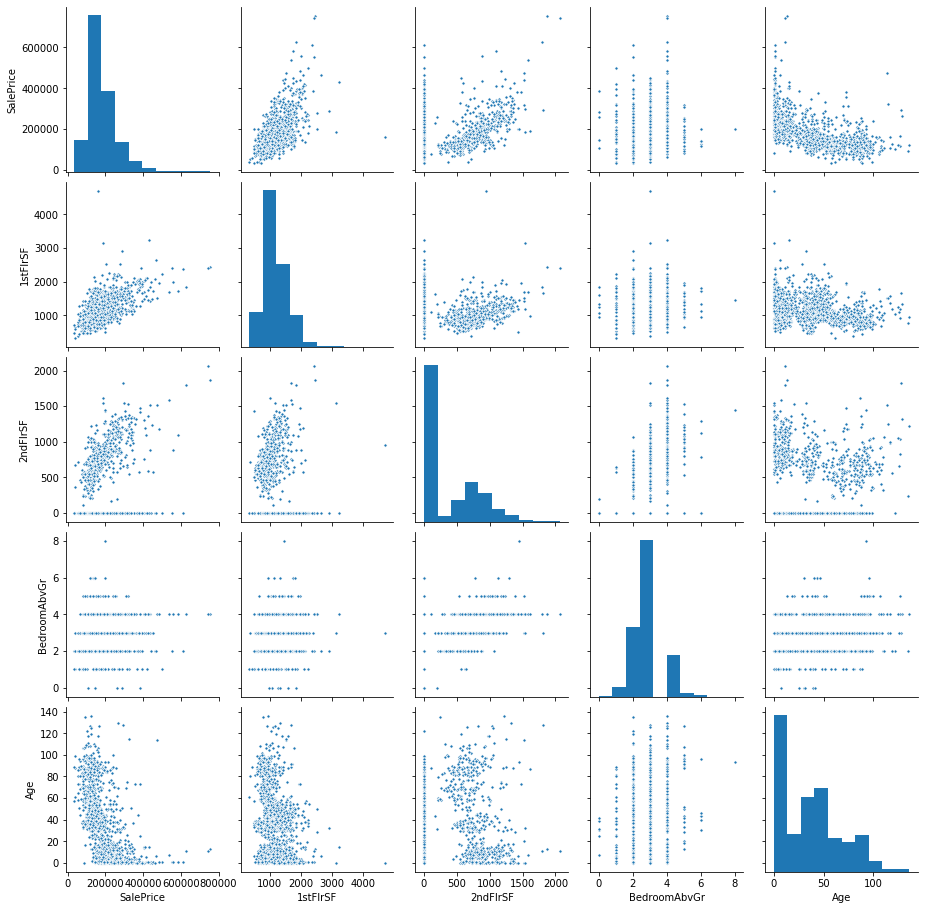

In [37]:
sns.pairplot(housing[['SalePrice']+numerical_vars[4:]], plot_kws={"s": 10});

In [38]:
housing[numerical_vars].corr()

,SalePrice,LotArea,OverallQual,OverallCond,1stFlrSF,2ndFlrSF,BedroomAbvGr,Age
SalePrice,1.000000,0.263843,0.790982,-0.077856,0.605852,0.319334,0.168213,-0.523350
LotArea,0.263843,1.000000,0.105806,-0.005636,0.299475,0.050986,0.119690,-0.014832
OverallQual,0.790982,0.105806,1.000000,-0.091932,0.476224,0.295493,0.101676,-0.572629
OverallCond,-0.077856,-0.005636,-0.091932,1.000000,-0.144203,0.028942,0.012980,0.377325
1stFlrSF,0.605852,0.299475,0.476224,-0.144203,1.000000,-0.202646,0.127401,-0.282143
2ndFlrSF,0.319334,0.050986,0.295493,0.028942,-0.202646,1.000000,0.502901,-0.011552
BedroomAbvGr,0.168213,0.119690,0.101676,0.012980,0.127401,0.502901,1.000000,0.068960
Age,-0.523350,-0.014832,-0.572629,0.377325,-0.282143,-0.011552,0.068960,1.000000


In [39]:
housing[numerical_vars].corr()['SalePrice'].sort_values(ascending=True)

Age            -0.523350
OverallCond    -0.077856
BedroomAbvGr    0.168213
LotArea         0.263843
2ndFlrSF        0.319334
1stFlrSF        0.605852
OverallQual     0.790982
SalePrice       1.000000
Name: SalePrice, dtype: float64

In [40]:
correlations = housing[numerical_vars].corr()
correlations

,SalePrice,LotArea,OverallQual,OverallCond,1stFlrSF,2ndFlrSF,BedroomAbvGr,Age
SalePrice,1.000000,0.263843,0.790982,-0.077856,0.605852,0.319334,0.168213,-0.523350
LotArea,0.263843,1.000000,0.105806,-0.005636,0.299475,0.050986,0.119690,-0.014832
OverallQual,0.790982,0.105806,1.000000,-0.091932,0.476224,0.295493,0.101676,-0.572629
OverallCond,-0.077856,-0.005636,-0.091932,1.000000,-0.144203,0.028942,0.012980,0.377325
1stFlrSF,0.605852,0.299475,0.476224,-0.144203,1.000000,-0.202646,0.127401,-0.282143
2ndFlrSF,0.319334,0.050986,0.295493,0.028942,-0.202646,1.000000,0.502901,-0.011552
BedroomAbvGr,0.168213,0.119690,0.101676,0.012980,0.127401,0.502901,1.000000,0.068960
Age,-0.523350,-0.014832,-0.572629,0.377325,-0.282143,-0.011552,0.068960,1.000000


In [41]:
print(correlations)

              SalePrice   LotArea  OverallQual  OverallCond  1stFlrSF  \
SalePrice      1.000000  0.263843     0.790982    -0.077856  0.605852   
LotArea        0.263843  1.000000     0.105806    -0.005636  0.299475   
OverallQual    0.790982  0.105806     1.000000    -0.091932  0.476224   
OverallCond   -0.077856 -0.005636    -0.091932     1.000000 -0.144203   
1stFlrSF       0.605852  0.299475     0.476224    -0.144203  1.000000   
2ndFlrSF       0.319334  0.050986     0.295493     0.028942 -0.202646   
BedroomAbvGr   0.168213  0.119690     0.101676     0.012980  0.127401   
Age           -0.523350 -0.014832    -0.572629     0.377325 -0.282143   

              2ndFlrSF  BedroomAbvGr       Age  
SalePrice     0.319334      0.168213 -0.523350  
LotArea       0.050986      0.119690 -0.014832  
OverallQual   0.295493      0.101676 -0.572629  
OverallCond   0.028942      0.012980  0.377325  
1stFlrSF     -0.202646      0.127401 -0.282143  
2ndFlrSF      1.000000      0.502901 -0.011552  

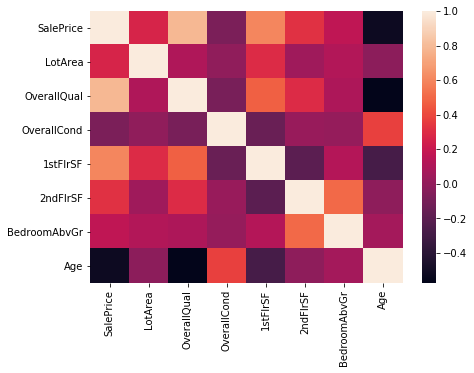

In [42]:
fig, ax = plt.subplots(figsize=(7,5))
sns.heatmap(correlations, ax = ax);

## Relationship of SalePrice with categorical variables

Here we are interested in the relashionship between the categorical variables in our dataset and the SalePrice of the house. The standard plot to examine the relashionship between a numerical and a categorical variable is the boxplot. A boxplot is a convenient way of graphically depicting groups of numerical data through their quartiles. Box plots may also have lines extending vertically from the boxes (whiskers) indicating variability outside the upper and lower quartiles, hence the terms box-and-whisker plot and box-and-whisker diagram. Outliers may be plotted as individual points. Box plots are non-parametric: they display variation in samples of a statistical population without making any assumptions of the underlying statistical distribution. 

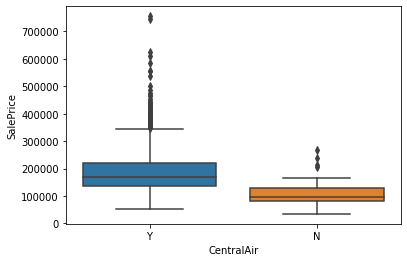

In [43]:
sns.boxplot(x='CentralAir', y='SalePrice', data=housing)

In [44]:
categorical_vars

['MSZoning',
 'LotShape',
 'Neighborhood',
 'CentralAir',
 'SaleCondition',
 'MoSold',
 'YrSold']

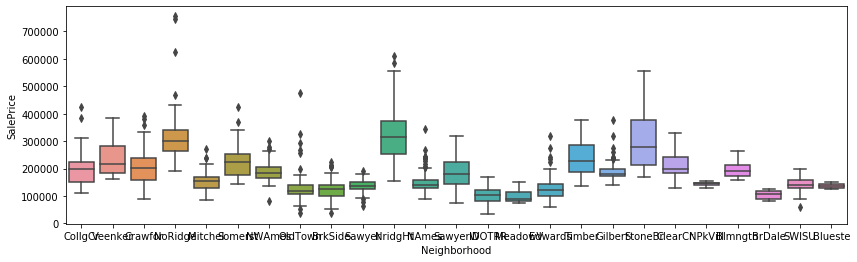

In [45]:
fig, ax = plt.subplots(figsize=(14,4))
sns.boxplot(x='Neighborhood', y='SalePrice', data=housing, ax=ax);

In [46]:
sorted_nb = housing.groupby('Neighborhood')['SalePrice'].median().sort_values().index.values

In [47]:
housing.groupby('Neighborhood')['SalePrice'].mean()

Neighborhood
Blmngtn    194870.882353
Blueste    137500.000000
BrDale     104493.750000
BrkSide    124834.051724
ClearCr    212565.428571
CollgCr    197965.773333
Crawfor    210624.725490
Edwards    128219.700000
Gilbert    192854.506329
IDOTRR     100123.783784
MeadowV     98576.470588
Mitchel    156270.122449
NAmes      145847.080000
NPkVill    142694.444444
NWAmes     189050.068493
NoRidge    335295.317073
NridgHt    316270.623377
OldTown    128225.300885
SWISU      142591.360000
Sawyer     136793.135135
SawyerW    186555.796610
Somerst    225379.837209
StoneBr    310499.000000
Timber     242247.447368
Veenker    238772.727273
Name: SalePrice, dtype: float64

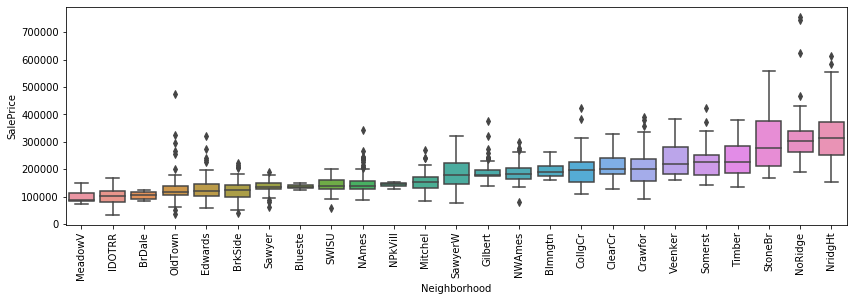

In [48]:
fig, ax = plt.subplots(figsize=(14,4))
sns.boxplot(x='Neighborhood', y='SalePrice', data=housing, order=sorted_nb, ax=ax)
plt.xticks(rotation='vertical');

In [49]:
sorted_nb

array(['MeadowV', 'IDOTRR', 'BrDale', 'OldTown', 'Edwards', 'BrkSide',
       'Sawyer', 'Blueste', 'SWISU', 'NAmes', 'NPkVill', 'Mitchel',
       'SawyerW', 'Gilbert', 'NWAmes', 'Blmngtn', 'CollgCr', 'ClearCr',
       'Crawfor', 'Veenker', 'Somerst', 'Timber', 'StoneBr', 'NoRidge',
       'NridgHt'], dtype=object)